In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/analise_sentimento_ecomerce.csv')
dados

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [3]:
dados.shape

(99224, 7)

In [4]:
dados = dados.dropna(subset=['review_comment_message'])
dados.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


In [5]:
dados.shape

(40977, 7)

In [6]:
dados['avaliacao'] = dados['review_score'].apply(lambda x: 'positivo' if x >= 4 else 'negativo')

<ipython-input-6-a31ca878df46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['avaliacao'] = dados['review_score'].apply(lambda x: 'positivo' if x >= 4 else 'negativo')


In [7]:
contagem_avaliacao = dados['avaliacao'].value_counts()
print(contagem_avaliacao)

avaliacao
positivo    26530
negativo    14447
Name: count, dtype: int64


In [8]:
from wordcloud import WordCloud

In [9]:
import matplotlib.pyplot as plt

In [10]:
def nuvem_palavras(texto, coluna_texto, avaliacao):
  # Filtrando as resenhas com base no avaliacao especificado
  texto_sentimento = texto.query(f"avaliacao == '{avaliacao}'")[coluna_texto]

  # Unindo todas as resenhas em uma única string
  texto_unido = ' '.join(texto_sentimento)

  # Criando e exibindo a nuvem de palavras
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

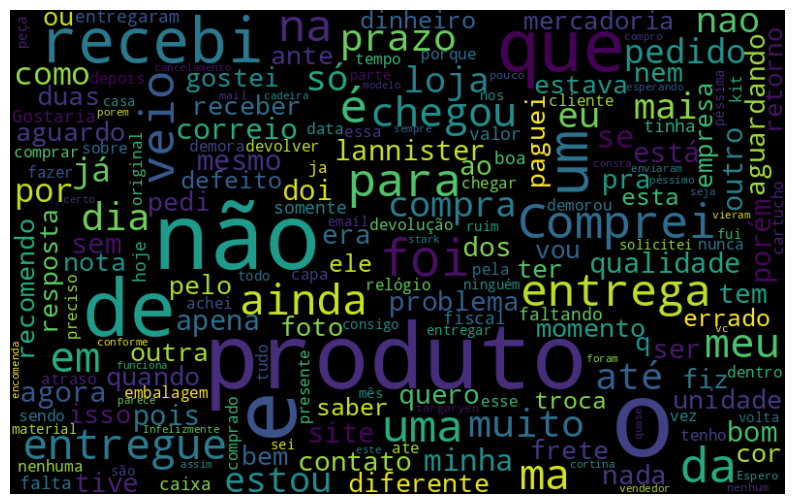

In [11]:
nuvem_palavras(dados, 'review_comment_message', 'negativo')

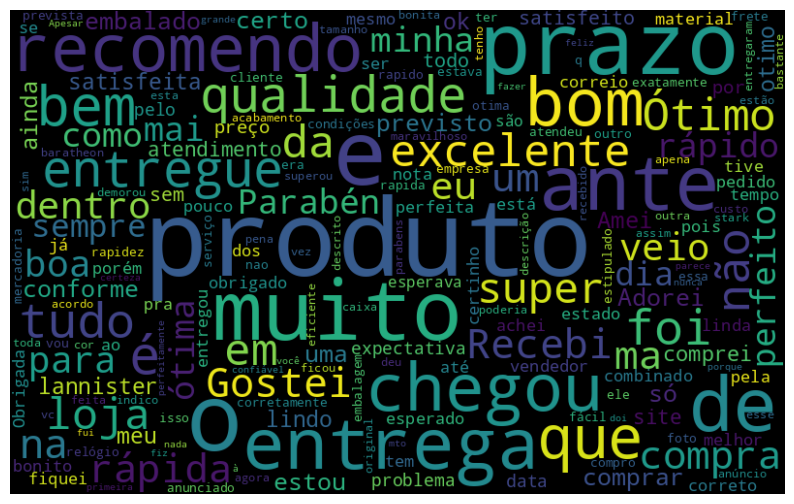

In [12]:
nuvem_palavras(dados, 'review_comment_message', 'positivo')

In [13]:
from wordcloud import WordCloud

In [14]:
todas_palavras = [texto for texto in dados.review_comment_message]
todas_palavras = ' '.join([texto for texto in dados.review_comment_message])
todas_palavras

'Recebi bem antes do prazo estipulado. Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho Mas um pouco ,travando...pelo valor ta Boa.\r\n Vendedor confiável, produto ok e entrega antes do prazo. GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU Péssimo Loja nota 10 obrigado pela atençao amim dispensada A compra foi realizada facilmente.\r\nA entrega foi efetuada muito antes do prazo dado.\r\nO produto já começou a ser usado e até o presente,\r\nsem problemas. relógio muito bonito e barato. Não gostei ! Comprei gato por lebre Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o produto. Recebi exatamente o que esperava. As dema

In [ ]:
import nltk

nltk.download("all")

In [16]:
!pip install unidecode==1.3.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.0 MB/s eta 0:00:00


In [17]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
import unidecode
from nltk import tokenize

In [18]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()



In [19]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [20]:
frase_processada = []

token_espaco = tokenize.WhitespaceTokenizer()

for opiniao in dados.review_comment_message:
  palavras_texto = token_espaco.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_1'] = frase_processada

<ipython-input-20-867ed335002e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['tratamento_1'] = frase_processada


In [21]:
frase_processada = []

for opiniao in dados['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

<ipython-input-21-764e199b8b6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['tratamento_2'] = frase_processada


In [22]:
dados[['review_comment_message', 'tratamento_1', 'tratamento_2']].head()

,review_comment_message,tratamento_1,tratamento_2
3,Recebi bem antes do prazo estipulado.,Recebi bem antes prazo estipulado.,Recebi bem antes prazo estipulado
4,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar Intern...,Parabéns lojas lannister adorei comprar Intern...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. site marca aparelho impres...,aparelho eficiente site marca aparelho impress...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas pouco ,travando...pelo valor ta Boa.",Mas pouco travando valor ta Boa
15,"Vendedor confiável, produto ok e entrega antes...","Vendedor confiável, produto ok entrega antes p...",Vendedor confiável produto ok entrega antes prazo


In [23]:
sem_acentos = [unidecode.unidecode(texto) for texto in dados['tratamento_2']]

In [24]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [25]:
dados['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in dados['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada

<ipython-input-25-2d4c35f6dd11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['tratamento_3'] = sem_acentos
<ipython-input-25-2d4c35f6dd11>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['tratamento_3'] = frase_processada


In [26]:
dados[['review_comment_message', 'tratamento_1', 'tratamento_2', 'tratamento_3']].head()

,review_comment_message,tratamento_1,tratamento_2,tratamento_3
3,Recebi bem antes do prazo estipulado.,Recebi bem antes prazo estipulado.,Recebi bem antes prazo estipulado,Recebi bem antes prazo estipulado
4,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar Intern...,Parabéns lojas lannister adorei comprar Intern...,Parabens lojas lannister adorei comprar Intern...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. site marca aparelho impres...,aparelho eficiente site marca aparelho impress...,aparelho eficiente site marca aparelho impress...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas pouco ,travando...pelo valor ta Boa.",Mas pouco travando valor ta Boa,Mas pouco travando valor ta Boa
15,"Vendedor confiável, produto ok e entrega antes...","Vendedor confiável, produto ok entrega antes p...",Vendedor confiável produto ok entrega antes prazo,Vendedor confiavel produto ok entrega antes prazo


In [27]:
frase_processada = []

for opiniao in dados['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada

<ipython-input-27-447852b20878>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['tratamento_4'] = frase_processada


In [28]:
dados[['review_comment_message', 'tratamento_1', 'tratamento_3', 'tratamento_4']].head()

,review_comment_message,tratamento_1,tratamento_3,tratamento_4
3,Recebi bem antes do prazo estipulado.,Recebi bem antes prazo estipulado.,Recebi bem antes prazo estipulado,recebi bem antes prazo estipulado
4,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar Intern...,Parabens lojas lannister adorei comprar Intern...,parabens lojas lannister adorei comprar intern...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. site marca aparelho impres...,aparelho eficiente site marca aparelho impress...,aparelho eficiente site marca aparelho impress...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas pouco ,travando...pelo valor ta Boa.",Mas pouco travando valor ta Boa,pouco travando valor ta boa
15,"Vendedor confiável, produto ok e entrega antes...","Vendedor confiável, produto ok entrega antes p...",Vendedor confiavel produto ok entrega antes prazo,vendedor confiavel produto ok entrega antes prazo


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [51]:
regressao_logistica = LogisticRegression()

In [37]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [38]:
classificar_texto(dados, 'review_comment_message', 'avaliacao')

Acurácia do modelo com 'review_comment_message': 82.36%


In [39]:
classificar_texto(dados, 'tratamento_1', 'avaliacao')

Acurácia do modelo com 'tratamento_1': 80.77%


In [40]:
classificar_texto(dados, 'tratamento_3', 'avaliacao')

Acurácia do modelo com 'tratamento_3': 81.26%


In [41]:
classificar_texto(dados, 'tratamento_4', 'avaliacao')

Acurácia do modelo com 'tratamento_4': 82.55%


In [42]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('gostei')

'gost'

In [43]:
frase_processada = []
for opinion in dados["tratamento_4"]:
    palavras_texto = token_pontuacao.tokenize(opinion)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada.append(" ".join(nova_frase))

dados["tratamento_5"] = frase_processada

<ipython-input-43-3caad3e5f5b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["tratamento_5"] = frase_processada


In [44]:
dados["tratamento_5"] = frase_processada

<ipython-input-44-031b743bdfc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["tratamento_5"] = frase_processada


In [45]:
dados[['review_comment_message', 'tratamento_1', 'tratamento_4', 'tratamento_5']].head()

,review_comment_message,tratamento_1,tratamento_4,tratamento_5
3,Recebi bem antes do prazo estipulado.,Recebi bem antes prazo estipulado.,recebi bem antes prazo estipulado,receb bem ant praz estipul
4,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar Intern...,parabens lojas lannister adorei comprar intern...,parab loj lannist ador compr internet segur pr...
9,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. site marca aparelho impres...,aparelho eficiente site marca aparelho impress...,aparelh efici sit marc aparelh impress cheg ou...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","Mas pouco ,travando...pelo valor ta Boa.",pouco travando valor ta boa,pouc trav val ta boa
15,"Vendedor confiável, produto ok e entrega antes...","Vendedor confiável, produto ok entrega antes p...",vendedor confiavel produto ok entrega antes prazo,vend confia produt ok entreg ant praz


In [46]:
classificar_texto(dados, 'tratamento_5', 'avaliacao')

Acurácia do modelo com 'tratamento_5': 84.45%


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidados = TfidfVectorizer(lowercase=False, max_features=50)            # usao o ngram diminuiu a acuracia

In [48]:
tfidados_bruto = tfidados.fit_transform(dados["review_comment_message"])

In [49]:
tfidados_bruto = tfidados.fit_transform(dados["review_comment_message"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidados_bruto, dados["avaliacao"], random_state=4978)

In [52]:
tfidados_bruto = tfidados.fit_transform(dados["review_comment_message"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidados_bruto, dados["avaliacao"], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidados_bruto = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidados_bruto *100:.2f}%")

Acurácia do modelo: 82.65%


In [53]:
tfidados = TfidfVectorizer(lowercase=False, max_features=1000)
tfidados_tratados = tfidados.fit_transform(dados["tratamento_5"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidados_tratados, dados["avaliacao"], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidados_tratados = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidados_tratados *100:.2f}%")

Acurácia do modelo: 89.11%


In [54]:
import joblib

joblib.dump(tfidados, 'tfidados_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_reg_log_sentimentos.pkl')

['modelo_reg_log_sentimentos.pkl']

In [59]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

def processar_review_comment_message(review_comment_message):
  # passo 1
  tokens = token_pontuacao.tokenize(review_comment_message)

  # passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

  # passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

  # passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

  # passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

In [60]:
novos_reviews = ['Adorei']

In [61]:
novos_reviews_processados = [processar_review_comment_message(review_comment_message) for review_comment_message in novos_reviews]

In [62]:
novos_reviews_tfidf = tfidados.transform(novos_reviews_processados)

predicoes = regressao_logistica.predict(novos_reviews_tfidf)

df_previsoes = pd.DataFrame({
    'review_comment_message': novos_reviews,
    'Sentimento previsto': predicoes
})

df_previsoes

,review_comment_message,Sentimento previsto
0,Adorei,positivo
